## VOD Analysis: Dry vs Wet

__Author:__ German Vargas G.

__Date:__ Oct - 23 - 2025

### Load Libraries

In [1]:
import gnssvod as gv
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates

### Pair data forest and sky data

Open the dataset you want to plot SNR. Do it by period, so it can be visualized dry season versus wet season. Do separate folders for each forest cover

In [3]:
# Define base paths for each location
base_path = "/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files"

# Define patterns for dry and wet seasons for each location
pattern_dry = {
    'SWIMAC': f"{base_path}/SWIMAC/DrySeason/*.nc",
    'PACQUI': f"{base_path}/PACQUI/DrySeason/*.nc",
    'MANCHI': f"{base_path}/MANCHI/DrySeason/*.nc",
    'MetSta': f"{base_path}/MetSta/DrySeason/*.nc"
}

pattern_wet = {
    'SWIMAC': f"{base_path}/SWIMAC/WetSeason/*.nc",
    'PACQUI': f"{base_path}/PACQUI/WetSeason/*.nc",
    'MANCHI': f"{base_path}/MANCHI/WetSeason/*.nc",
    'MetSta': f"{base_path}/MetSta/WetSeason/*.nc"
}

# Define time intervals for dry and wet seasons
startday_DrySeason = pd.to_datetime('15-04-2025', format='%d-%m-%Y')
startday_WetSeason = pd.to_datetime('12-08-2025', format='%d-%m-%Y')

timeintervals_DrySeason = pd.interval_range(start=startday_DrySeason, periods=10, freq='D', closed='left')
timeintervals_WetSeason = pd.interval_range(start=startday_WetSeason, periods=10, freq='D', closed='left')

# Define pairings (MetSta as reference with each forest site)
pairings = {
    'SWIMAC_pair': ('MetSta', 'SWIMAC'),
    'PACQUI_pair': ('MetSta', 'PACQUI'),
    'MANCHI_pair': ('MetSta', 'MANCHI')
}

# Define output directories for each pairing with season-specific subdirectories
outputdir_dry = {
    'SWIMAC_pair': f"{base_path}/SWIMAC/Paired/DrySeason",
    'PACQUI_pair': f"{base_path}/PACQUI/Paired/DrySeason",
    'MANCHI_pair': f"{base_path}/MANCHI/Paired/DrySeason"
}

outputdir_wet = {
    'SWIMAC_pair': f"{base_path}/SWIMAC/Paired/WetSeason",
    'PACQUI_pair': f"{base_path}/PACQUI/Paired/WetSeason",
    'MANCHI_pair': f"{base_path}/MANCHI/Paired/WetSeason"
}

# Define variables to keep
keepvars = ['S*', 'Azimuth', 'Elevation']

# Process Dry Season
print("Processing Dry Season data...")
out_dry = gv.gather_stations(pattern_dry, pairings, timeintervals_DrySeason, 
                           keepvars=keepvars, outputdir=outputdir_dry)

# Process Wet Season
print("Processing Wet Season data...")
out_wet = gv.gather_stations(pattern_wet, pairings, timeintervals_WetSeason, 
                           keepvars=keepvars, outputdir=outputdir_wet)

Processing Dry Season data...
Extracting Epochs from files
----- Processing SWIMAC_pair
-- Processing interval [2025-04-15 00:00:00, 2025-04-16 00:00:00)
Found 1 file(s) for MetSta
Reading
----- Processing SWIMAC_pair
-- Processing interval [2025-04-15 00:00:00, 2025-04-16 00:00:00)
Found 1 file(s) for MetSta
Reading
Found 1 file(s) for SWIMAC
Reading
Concatenating stations
Found 1 file(s) for SWIMAC
Reading
Concatenating stations
Saving result in /Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/SWIMAC/Paired/DrySeason
Saved 18102 observations in SWIMAC_pair_20250415000000_20250416000000.nc
-- Processing interval [2025-04-16 00:00:00, 2025-04-17 00:00:00)
Found 2 file(s) for MetSta
Reading
Saving result in /Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/SWIMAC/Paired/DrySeason
Saved 18102 observations in SWIMAC_pair_20250415000000_20250416000000.nc
-- Processing interval [2025-04-16 00:00:00, 2025-04-17 00:00:00)
Found 

### Calculate VOD per season

Now we will get the VOD for each species for each season

#### Step 1: Load paired data and calculate VOD

In [4]:
# Define base path
base_path = "/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files"

# Define patterns for each species and season
patterns = {
    'SWIMAC_dry': f"{base_path}/SWIMAC/Paired/DrySeason/*.nc",
    'SWIMAC_wet': f"{base_path}/SWIMAC/Paired/WetSeason/*.nc",
    'PACQUI_dry': f"{base_path}/PACQUI/Paired/DrySeason/*.nc",
    'PACQUI_wet': f"{base_path}/PACQUI/Paired/WetSeason/*.nc",
    'MANCHI_dry': f"{base_path}/MANCHI/Paired/DrySeason/*.nc",
    'MANCHI_wet': f"{base_path}/MANCHI/Paired/WetSeason/*.nc"
}

# Define pairings for each species (MetSta is always the reference station)
pairings = {
    'SWIMAC_dry': ('MetSta', 'SWIMAC'),
    'SWIMAC_wet': ('MetSta', 'SWIMAC'),
    'PACQUI_dry': ('MetSta', 'PACQUI'),
    'PACQUI_wet': ('MetSta', 'PACQUI'),
    'MANCHI_dry': ('MetSta', 'MANCHI'),
    'MANCHI_wet': ('MetSta', 'MANCHI')
}

# Define frequency bands to combine
bands = {'VOD1':['S1','S1X','S1C'],'VOD7':['S7','S7X','S7C']}

# Calculate VOD for each species and season
vod_results = {}

# Process each pattern and store results
for site_season, pattern in patterns.items():
    print(f"Processing {site_season}...")
    site_pairings = {site_season: pairings[site_season]}
    vod = gv.calc_vod(pattern, site_pairings, bands)
    vod_results[site_season] = vod[site_season]

# Display summary of results
for site_season, vod_data in vod_results.items():
    print(f"\nSummary for {site_season}:")
    print(vod_data)

Processing SWIMAC_dry...
Processing SWIMAC_wet...
Processing SWIMAC_wet...
Processing PACQUI_dry...
Processing PACQUI_dry...
Processing PACQUI_wet...
Processing PACQUI_wet...
Processing MANCHI_dry...
Processing MANCHI_dry...
Processing MANCHI_wet...
Processing MANCHI_wet...

Summary for SWIMAC_dry:
                             VOD1  VOD7  Azimuth  Elevation
Epoch               SV                                     
2025-04-17 00:00:00 C11       NaN   NaN    -31.4       19.4
                    C12       NaN   NaN     -1.1       70.5
                    C14       NaN   NaN   -114.5       20.0
                    C21       NaN   NaN    -14.4       52.1
                    C22       NaN   NaN     31.3       15.0
...                           ...   ...      ...        ...
2025-04-22 23:59:30 R03  1.013685   NaN    -87.8       47.2
                    R04 -0.486593   NaN   -129.2       12.2
                    R17  0.514152   NaN     -4.7       48.1
                    R23       NaN   NaN 

#### Step 2: Hemispheric plot of VOD

Use the Hemi class to calculate and plot a gridded representation of VOD

Saved figure to: /Users/vargasgg/Documents/github_repos/GNSS_ACG/PyNotebooks/figures/VOD_comparison_dry_wet.png


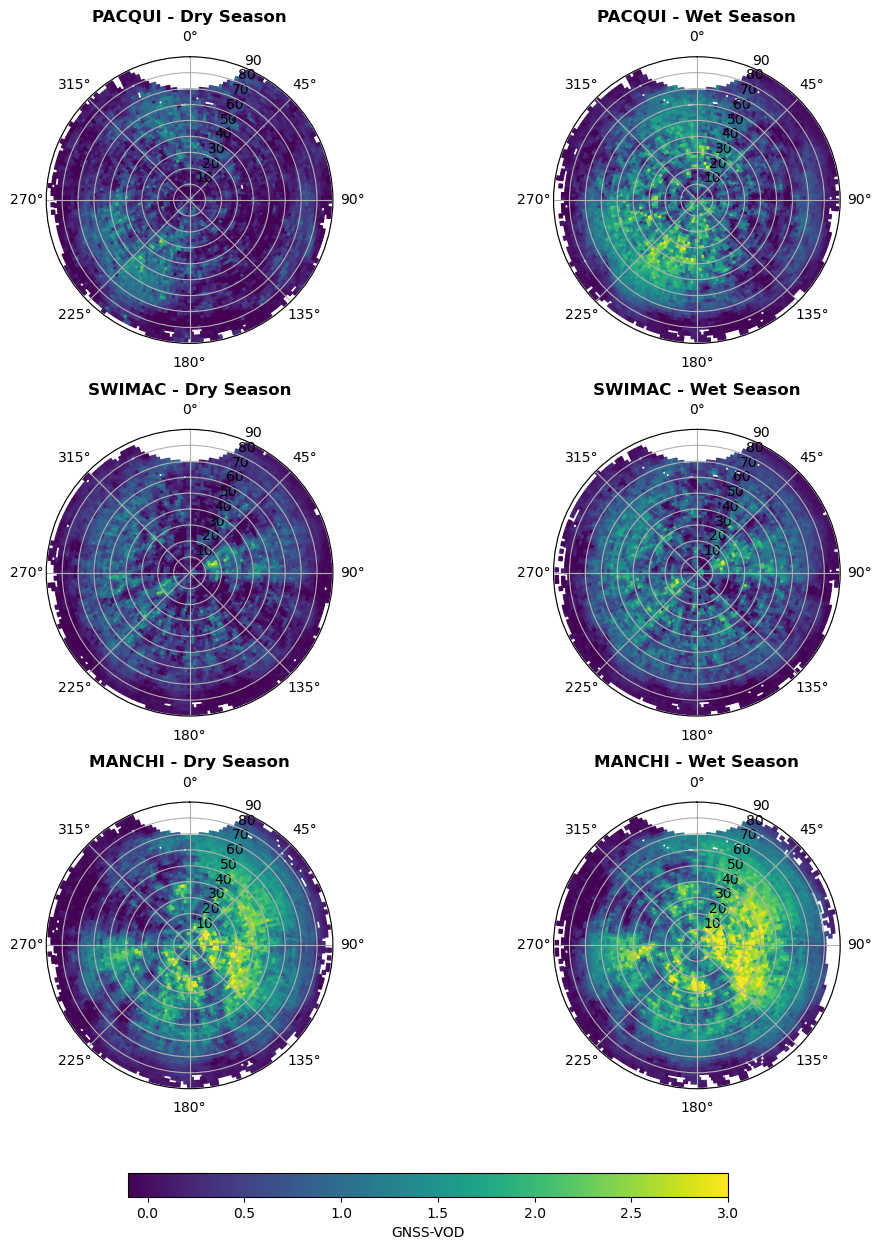

In [19]:
import os
from pathlib import Path

# Initialize hemispheric grid
hemi = gv.hemibuild(2)
patches = hemi.patches()

# Process each species and season
species = ['PACQUI', 'SWIMAC', 'MANCHI']
vod_processed = {}

for site_season, vod_data in vod_results.items():
    # Classify vod into grid cells
    processed = hemi.add_CellID(vod_data).drop(columns=['Azimuth', 'Elevation'])
    # Get average value per grid cell
    vod_avg = processed.groupby(['CellID']).agg(['mean', 'std', 'count'])
    # Flatten the columns
    vod_avg.columns = ["_".join(x) for x in vod_avg.columns.to_flat_index()]
    vod_processed[site_season] = vod_avg

# Create figure with subplots for each species
fig, axes = plt.subplots(len(species), 2, figsize=(12, 4*len(species)), 
                         subplot_kw=dict(projection='polar'))

# Plot for each species
for i, species_name in enumerate(species):
    dry_data = vod_processed[f'{species_name}_dry']
    wet_data = vod_processed[f'{species_name}_wet']

    for j, (season_data, season_name) in enumerate([(dry_data, 'Dry Season'), 
                                                     (wet_data, 'Wet Season')]):
        # Associate mean values to patches
        ipatches = pd.concat([patches, season_data['VOD1_mean']], join='inner', axis=1)

        # Create patch collection
        pc = PatchCollection(ipatches.Patches, array=ipatches['VOD1_mean'],
                             edgecolor='face', linewidth=1)
        pc.set_clim([-0.1, 3])

        # Add to subplot
        axes[i, j].add_collection(pc)
        axes[i, j].set_rlim([0, 90])
        axes[i, j].set_theta_zero_location("N")
        axes[i, j].set_theta_direction(-1)
        axes[i, j].set_title(f'{species_name} - {season_name}', fontweight='bold')

# Create a dedicated colorbar axis centered under the last row (MANCHI)
# Coordinates are [left, bottom, width, height] in figure fraction
cbar_left = 0.25
cbar_width = 0.5
cbar_bottom = 0.03
cbar_height = 0.02
cax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])

# Use the last PatchCollection (pc) as the mappable for the colorbar
cbar = fig.colorbar(pc, cax=cax, orientation='horizontal')
cbar.set_label('GNSS-VOD')

# Ensure figures directory exists and save the figure
notebook_fig_dir = Path('/Users/vargasgg/Documents/github_repos/GNSS_ACG/PyNotebooks/figures')
notebook_fig_dir.mkdir(parents=True, exist_ok=True)
output_path = notebook_fig_dir / 'VOD_comparison_dry_wet.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight')
print(f'Saved figure to: {output_path}')

# Adjust spacing between subplots to bring plots closer and leave room for the colorbar
plt.subplots_adjust(top=0.98, bottom=0.12, hspace=0.3)
plt.show()

#### Step 4: Analyse VOD differences

Run an analysis to test the difference in VOD values per season for each species